# Fastcampus Data EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
url = 'FC_data.xlsx'
data = pd.read_excel(url)

In [39]:
plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

In [10]:
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


,method,pg
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
105414,False,False
105415,False,False
105416,False,False
105417,False,False


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [13]:
data['coupon_title'].unique()

array([nan, '[10% 할인] 시크릿코드 실무 완성편', '[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰',
       '[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰', '[웰컴쿠폰] 온라인 완주반 5만원 할인 쿠폰',
       '?즉시할인 쿠폰 코드 : spring5% ?', '[럭키룰렛] 올인원패키지',
       '[웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰', '타이포그래피 기수강생 할인 쿠폰',
       '[할인쿠폰] 파이낸스 카테고리 올인원 패키지 30% 할인 (금융 아카데미 제외)', '[럭키룰렛] 완주반',
       '[10% 할인] 프론트엔드 실무 완성편',
       '한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)',
       '수강생 50만명 돌파 기념 감사제 쿠폰', '올인원 패키지 : 타이포그래피와 편집디자인 강의 수강권',
       '[무료수강권] 강의 검수용_이호상 PM님', '패캐머_온라인 쿠폰 !',
       '[무료수강권] 파이낸스 카테고리 올인원 패키지_대체투자 자산운용 실무 영상 오픈 일정 변경',
       '한 번에 끝내는 반복 업무 자동화 초격차 패키지 사용 가능 쿠폰', 'crm 검수용 쿠폰 aop',
       '[쿠폰재발급]수강생 50만명 돌파 기념 감사제 쿠폰', '[재발급] 페이백 쿠폰',
       '[무료수강권] 강의검수용_강사님 쿠폰_박혜린 강사님', '신해동 발행 쿠폰', '[무료수강권] 강사님 제공용 RED',
       '[무료수강권] 강사님 제공용', '[할인쿠폰] 영상/디자인 카테고리 올인원 패키지 5만원 할인_영상 오픈 일정 변경',
       '[무료수강권] 내부직원 검수용 RED',
       '[무료수강권] 올인원 패키지 : 인스타를 성장시킨 50명의 성공 방정식 강의검수용_강사님 쿠폰', '올인원패키지',
       '[무료수강권] 내부직원 강의 검수용',
       '[무료수강권] 권오상 회계사

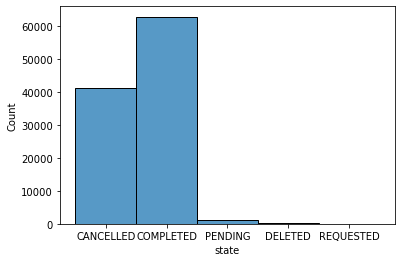

In [16]:
sns.histplot(data=data, x='state')
plt.show()

In [65]:
combine_course_coupon = data[['course_title','coupon_title']]
combine_course_coupon

,course_title,coupon_title
0,올인원 패키지 : 알고리즘 기술면접 완전 정복,NaN
1,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,NaN
2,시크릿코드 : 프론트엔드 실무 완성편,[10% 할인] 시크릿코드 실무 완성편
3,시크릿코드 : 프론트엔드 실무 완성편,NaN
4,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰
...,...,...
105414,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,[WELCOME] 온라인 강의 2만원 할인쿠폰
105415,부동산 디벨로퍼 아카데미 : 인허가,NaN
105416,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,[WELCOME] 온라인 강의 2만원 할인쿠폰
105417,부동산 디벨로퍼 아카데미 : 인허가,NaN


In [60]:
combine_course_coupon

0                                                       NaN
1                                                       NaN
2                 시크릿코드 : 프론트엔드 실무 완성편[10% 할인] 시크릿코드 실무 완성편
3                                                       NaN
4         올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX[웰컴쿠폰] 올인원 패키지 2만...
                                ...                        
105414    초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기[WELCOME] 온라인 강...
105415                                                  NaN
105416    초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기[WELCOME] 온라인 강...
105417                                                  NaN
105418          용호수의 돈 버는 실전 영상 제작[WELCOME] 온라인 강의 3만원 할인쿠폰
Length: 105419, dtype: object

In [52]:
data['coupon_title'].value_counts()

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                                 5498
[WELCOME] 온라인 강의 3만원 할인쿠폰                                3206
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                                 2469
[WELCOME] 온라인 강의 2만원 할인쿠폰                                2325
[WELCOME] 온라인 강의 1만원 할인쿠폰                                1900
                                                         ... 
[무료수강권] 한 번에 끝내는 Java/Spring 웹 개발 마스터 초격차 패키지_안성훈 강사님       1
오늘 단 하루! 하루 10분컷 5%할인 (~6/2)                                1
[무료수강권] RED 검수용_공정필 PM님                                     1
[서포터즈 전용] 재무/세무 회계 실무 완성 무료 수강                              1
[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                   1
Name: coupon_title, Length: 494, dtype: int64

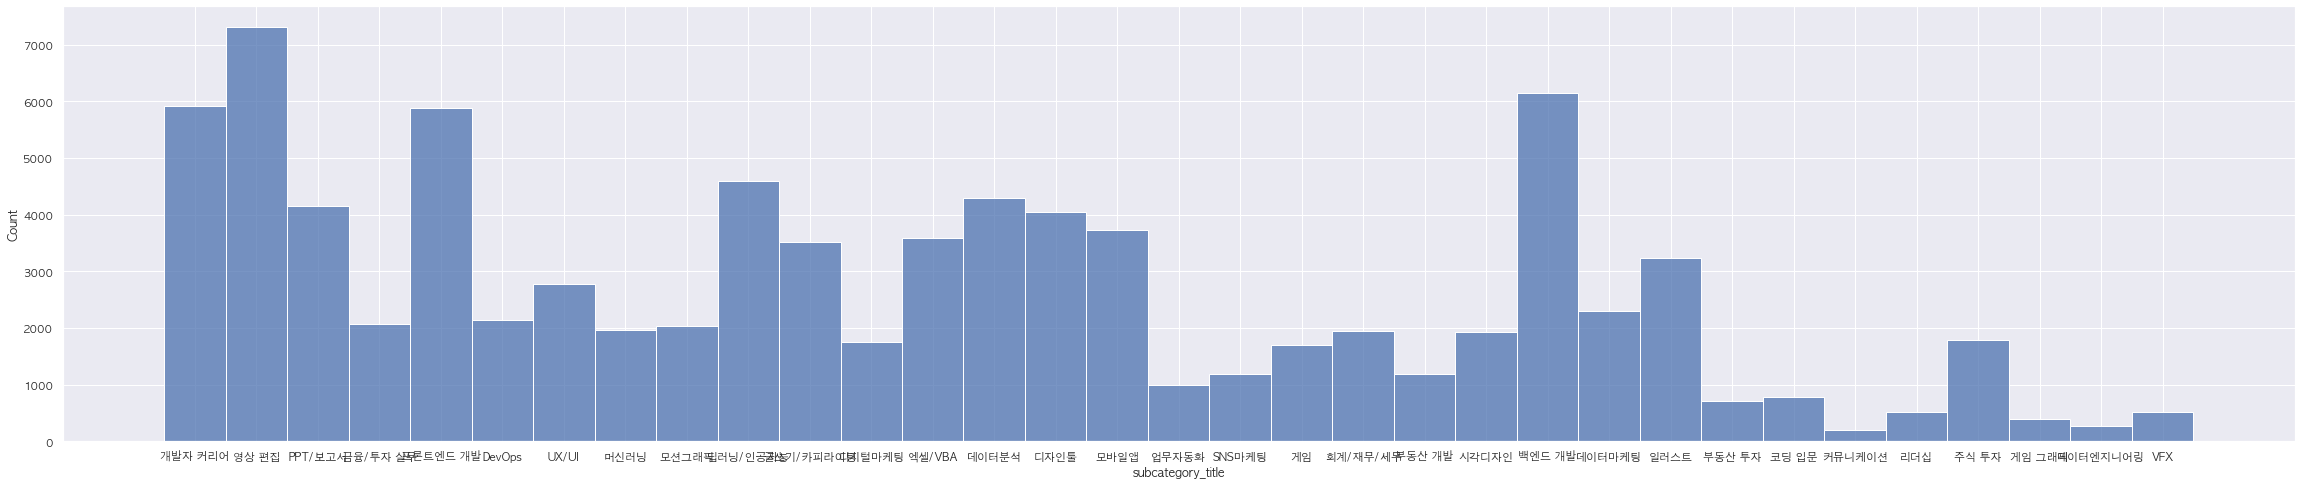

In [43]:
plt.figure(figsize=(40,8))
sns.histplot(data, x='subcategory_title')
plt.show()

In [30]:
data.corr()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
id,1.000000,0.201490,0.360501,0.026398,0.069284,0.044891,0.036309
customer_id,0.201490,1.000000,0.023889,0.018670,-0.344772,-0.001245,-0.002124
course_id,0.360501,0.023889,1.000000,0.045096,0.015162,0.042551,0.042170
transaction_amount,0.026398,0.018670,0.045096,1.000000,-0.342960,0.954943,0.947017
coupon_discount_amount,0.069284,-0.344772,0.015162,-0.342960,1.000000,0.251692,0.244997
sale_price,0.044891,-0.001245,0.042551,0.954943,0.251692,1.000000,0.988255
tax_free_amount,0.036309,-0.002124,0.042170,0.947017,0.244997,0.988255,1.000000


In [32]:
data.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [33]:
data.isna().sum() / len(data) * 100

id                         0.000000
customer_id                0.002846
course_id                  4.939337
type                       0.000000
state                      0.000000
course_title               0.015178
category_title             0.022766
format                     0.015178
completed_at               0.000000
transaction_amount         0.000000
coupon_title              69.818534
coupon_discount_amount    69.818534
sale_price                 1.070016
tax_free_amount            1.070016
pg                        14.300079
method                    12.422808
subcategory_title         18.809702
marketing_start_at        17.054800
dtype: float64

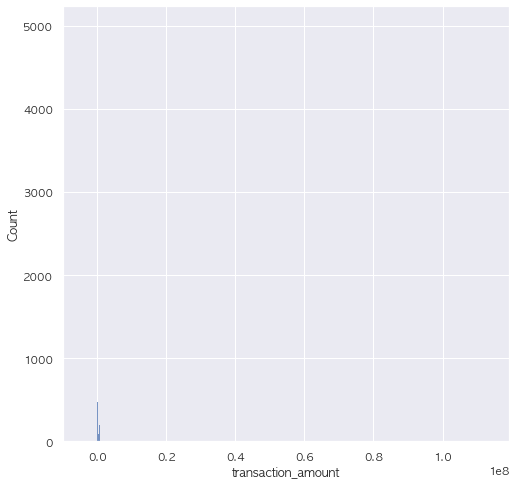

In [44]:
plt.figure(figsize=(8,8))
sns.histplot(data, x='transaction_amount')
plt.show()

# 1. 결제수단 분석

In [172]:
payment_data = data
payment_data['pg'] = data['pg'].fillna('PG')
payment_data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,PG,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,PG,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,PG,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,PG,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,PG,CARD,PPT/보고서,2019-11-14


In [173]:
payment_data['pg'].isna().sum()

0

In [174]:
payment_data[payment_data['method'].isna()]['state'].unique()

array([], dtype=object)

In [175]:
payment_data['method'].isna().sum()

0

In [176]:
payment_data['method'].fillna('', inplace=True)
payment_data['method'].isna().sum()

0

In [177]:
payment_data=payment_data['pg']+ ' '+ payment_data['method']


In [178]:
data2 = data.copy()
data2['payment_data']=payment_data

In [179]:
data2.drop(['pg', 'method'], axis=1, inplace=True)

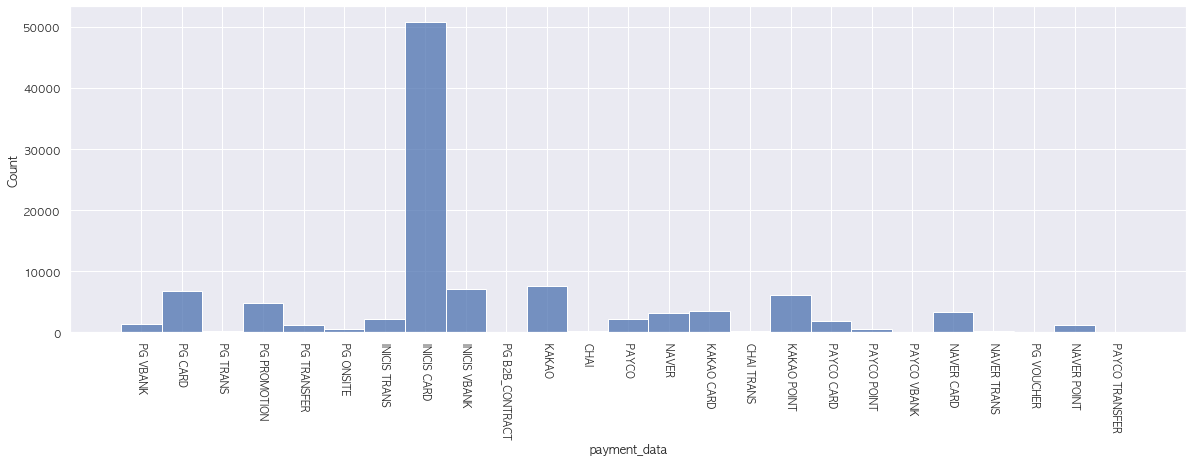

In [180]:
plt.figure(figsize=(20, 6))
sns.histplot(data2, x='payment_data')
plt.xticks(rotation=-90, fontsize=10)
plt.show()

# 2.